In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Load datasets

In [2]:
GDP = pd.read_csv('Final-GDP-dataset.csv')
suicide = pd.read_csv('../datasets/Suicide-rate.csv')
spending =  pd.read_csv('Final-GDP-dataset.csv')

C:\Users\majd_\AppData\Local\Temp\ipykernel_34180\2218096916.py:1: DtypeWarning: Columns (33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67) have mixed types. Specify dtype option on import or set low_memory=False.
  GDP = pd.read_csv('Final-GDP-dataset.csv')
C:\Users\majd_\AppData\Local\Temp\ipykernel_34180\2218096916.py:3: DtypeWarning: Columns (33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67) have mixed types. Specify dtype option on import or set low_memory=False.
  spending =  pd.read_csv('Final-GDP-dataset.csv')


### pre-process spending & GDP datasets

In [3]:
# Drop rows with irrelevant totals 
spending = spending.drop(spending[(spending.GeoName == 'New England') |\
                                  (spending.GeoName == 'District of Columbia') |\
                                  (spending.GeoName == 'Great Lakes') |\
                                  (spending.GeoName == 'Plains') |\
                                  (spending.GeoName == 'Southeast') |\
                                  (spending.GeoName == 'Southwest') |\
                                  (spending.GeoName == 'Far West') |\
                                  (spending.GeoName == 'Rocky Mountain') |\
                                  (spending.GeoName == 'Mideast')
                                 ].index)

GDP = GDP.drop(GDP[(GDP.GeoName == 'New England') |\
                                  (GDP.GeoName == 'District of Columbia') |\
                                  (GDP.GeoName == 'Great Lakes') |\
                                  (GDP.GeoName == 'Plains') |\
                                  (GDP.GeoName == 'Southeast') |\
                                  (GDP.GeoName == 'Southwest') |\
                                  (GDP.GeoName == 'Far West') |\
                                  (GDP.GeoName == 'Rocky Mountain') |\
                                  (GDP.GeoName == 'Mideast')
                                 ].index)

# Drop rows with irrelevant units 
spending = spending.drop(spending[spending.Unit != 'Thousands of dollars'].index)
GDP = GDP.drop(GDP[GDP.Unit != 'Thousands of dollars'].index)

# Drop irrelevant columns 
spending = spending.drop(['Unnamed: 0', 'GeoFIPS', 'LineCode', 'TableName', 'IndustryClassification'], axis=1)
GDP = GDP.drop(['Unnamed: 0', 'GeoFIPS', 'LineCode', 'TableName', 'IndustryClassification'], axis=1)

In [4]:
spending = spending.replace({'GeoName' : {
        'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
        'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
        'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
        'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
        'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
        'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
        'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
        'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
        'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
        'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
        }})


GDP = GDP.replace({'GeoName' : {
        'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
        'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
        'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
        'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
        'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
        'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
        'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
        'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
        'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
        'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
        }})

In [5]:
# spending & GDP per region per year
sp_avr = spending.groupby('Region').mean()[['2005', '2014', '2015', '2016', '2017', '2018', '2019', '2020']]
GDP_avr = GDP.groupby('Region').mean()[['2005', '2014', '2015', '2016', '2017', '2018', '2019', '2020']]

In [6]:
'''
What is the main spending category per region?
'''
sp_cat = spending.groupby(['Region', 'Description']).mean()[['2005', '2014', '2015', '2016', '2017', '2018', '2019', '2020']]
sp_cat

2005  \
Region Description                                                       
0             Apparel and other textile products          0.000000e+00   
              Chemicals and allied products               0.000000e+00   
              Electronic and other electric equipment 2/  0.000000e+00   
              Fabricated metal products                   0.000000e+00   
              Food and kindred products                   0.000000e+00   
...                                                                ...   
8      Natural resources and mining                       2.116075e+06   
       Private goods-producing industries 2/              1.620078e+07   
       Private services-providing industries 3/           5.703972e+07   
       Trade                                              1.202429e+07   
       Transportation and utilities                       3.468494e+06   

                                                                  2014  \
Region Description                                                       
0             Apparel and other textile products          0.000000e+00   
              Chemicals and allied products               0.000000e+00   
              Electronic and other electric equipment 2/  0.000000e+00   
              Fabricated metal products                   0.000000e+00   
              Food and kindred products                   0.000000e+00   
...                                                                ...   
8      Natural resources and mining                       3.232686e+06   
       Private goods-producing industries 2/              1.969744e+07   
       Private services-providing industries 3/           8.152326e+07   
       Trade                                              1.563998e+07   
       Transportation and utilities                       4.961967e+06   

                                                                  2015  \
Region Description                                                       
0             Apparel and other textile products          0.000000e+00   
              Chemicals and allied products               0.000000e+00   
              Electronic and other electric equipment 2/  0.000000e+00   
              Fabricated metal products                   0.000000e+00   
              Food and kindred products                   0.000000e+00   
...                                                                ...   
8      Natural resources and mining                       2.546213e+06   
       Private goods-producing industries 2/              2.023370e+07   
       Private services-providing industries 3/           8.681266e+07   
       Trade                                              1.666406e+07   
       Transportation and utilities                       5.304228e+06   

                                                                  2016  \
Region Description                                                       
0             Apparel and other textile products          0.000000e+00   
              Chemicals and allied products               0.000000e+00   
              Electronic and other electric equipment 2/  0.000000e+00   
              Fabricated metal products                   0.000000e+00   
              Food and kindred products                   0.000000e+00   
...                                                                ...   
8      Natural resources and mining                       2.424969e+06   
       Private goods-producing industries 2/              2.049672e+07   
       Private services-providing industries 3/           9.072043e+07   
       Trade                                              1.667851e+07   
       Transportation and utilities                       5.657588e+06   

                                                                  2017  \
Region Description                                                       
0             Apparel and other textile products          0.000000

### pre-process suicide dataset

In [7]:
spending

,GeoName,Region,Description,Unit,1998,1999,2000,2001,2002,2003,...,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996
16016,AL,5,All industry total,Thousands of dollars,6675409.0,6941288.0,7503920.0,7528501.0,7545572.0,7967007.0,...,0,0,0,0,0,0,0,0,0,0
16017,AL,5,Private industries,Thousands of dollars,6764859.0,7033155.0,7584986.0,7621529.0,7652857.0,8077073.0,...,0,0,0,0,0,0,0,0,0,0
16018,AL,5,"Agriculture, forestry, fishing and hunting",Thousands of dollars,-43665.0,-114294.0,-101967.0,-182991.0,-215679.0,-147006.0,...,0,0,0,0,0,0,0,0,0,0
16019,AL,5,Farms,Thousands of dollars,-55401.0,-125924.0,-117506.0,-197816.0,-228311.0,-164744.0,...,0,0,0,0,0,0,0,0,0,0
16020,AL,5,"Forestry, fishing, and related activities",Thousands of dollars,11736.0,11630.0,15539.0,14825.0,12632.0,17738.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65927,WY,7,Military,Thousands of dollars,0.0,0.0,0.0,0.0,0.0,0.0,...,19004,20390,21190,21323,22684,26415,29375,32258,34555,35245
65928,WY,7,State and local,Thousands of dollars,0.0,0.0,0.0,0.0,0.0,0.0,...,138527,135715,153254,151356,155026,180481,182617,200329,214939,220693
65929,WY,7,Electronic equipment and instruments 5/,Thousands of dollars,0.0,0.0,0.0,0.0,0.0,0.0,...,271,2093,(D),(D),(D),3316,3419,5446,10333,9257
65930,WY,7,Depository and nondepository institutions 6/,Thousands of dollars,0.0,0.0,0.0,0.0,0.0,0.0,...,88797,73367,97931,102556,119932,147071,150223,167913,241486,288010


In [8]:
# extract region numbers column from spending data set & add it to suicide dataset
regions = spending[['GeoName','Region']]
df2 = pd.merge(suicide, regions, left_on='STATE', right_on='GeoName')
df2.drop('GeoName', axis=1,inplace=True)
df2 = df2.drop_duplicates()


sui_avr = df2.groupby(['Region', 'YEAR']).mean().unstack(1)
sui_avr


RATE                                                         \
YEAR         2005       2014       2015       2016       2017       2018   
Region                                                                     
1        9.750000  13.383333  12.883333  13.416667  14.650000  14.450000   
2        8.260000  10.540000  10.300000  10.180000  10.560000  10.620000   
3       10.900000  12.760000  13.420000  13.660000  14.360000  14.480000   
4       12.500000  15.057143  15.728571  16.628571  17.671429  17.042857   
5       12.308333  14.525000  15.116667  15.200000  16.166667  15.991667   
6       14.975000  17.575000  18.675000  18.450000  18.500000  19.475000   
7       17.620000  20.980000  23.460000  22.960000  24.400000  23.620000   
8       14.116667  16.633333  17.050000  17.083333  18.150000  17.183333   

                              
YEAR         2019       2020  
Region                        
1       13.950000  12.850000  
2       10.400000   9.840000  
3       13.700000  13.560000  
4       17.514286  17.400000  
5       15.541667  15.566667  
6       19.150000  19.250000  
7       23.840000  24.420000  
8       18.466667  17.016667

In [9]:
sp_avr

,2005,2014,2015,2016,2017,2018,2019,2020
Region,,,,,,,,
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,8.182572e+05,1.065898e+06,1.122022e+06,1.153088e+06,1.184579e+06,1.243561e+06,1.293282e+06,1.244030e+06
2,3.114584e+06,4.217601e+06,4.379788e+06,4.522631e+06,4.651735e+06,4.874967e+06,5.088250e+06,4.798823e+06
3,2.685477e+06,3.404731e+06,3.515872e+06,3.585277e+06,3.681623e+06,3.846721e+06,3.962084e+06,3.744011e+06
4,8.036759e+05,1.126908e+06,1.156022e+06,1.172831e+06,1.209243e+06,1.260719e+06,1.297406e+06,1.246523e+06
5,1.649919e+06,2.101664e+06,2.194574e+06,2.265593e+06,2.367472e+06,2.477489e+06,2.587172e+06,2.492921e+06
6,2.446440e+06,3.711238e+06,3.697861e+06,3.706372e+06,3.939566e+06,4.279823e+06,4.389963e+06,4.134161e+06
7,5.653128e+05,8.075318e+05,8.304234e+05,8.509622e+05,8.982879e+05,9.700514e+05,1.025765e+06,9.857673e+05
8,2.649913e+06,3.687122e+06,3.894345e+06,4.042953e+06,4.299187e+06,4.594247e+06,4.830606e+06,4.666662e+06


In [10]:
sui_avr.join(sp_avr, how='inner')

C:\Users\majd_\AppData\Local\Temp\ipykernel_34180\2455706876.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  sui_avr.join(sp_avr, how='inner')


,"(RATE, 2005)","(RATE, 2014)","(RATE, 2015)","(RATE, 2016)","(RATE, 2017)","(RATE, 2018)","(RATE, 2019)","(RATE, 2020)",2005,2014,2015,2016,2017,2018,2019,2020
Region,,,,,,,,,,,,,,,,
1,9.750000,13.383333,12.883333,13.416667,14.650000,14.450000,13.950000,12.850000,8.182572e+05,1.065898e+06,1.122022e+06,1.153088e+06,1.184579e+06,1.243561e+06,1.293282e+06,1.244030e+06
2,8.260000,10.540000,10.300000,10.180000,10.560000,10.620000,10.400000,9.840000,3.114584e+06,4.217601e+06,4.379788e+06,4.522631e+06,4.651735e+06,4.874967e+06,5.088250e+06,4.798823e+06
3,10.900000,12.760000,13.420000,13.660000,14.360000,14.480000,13.700000,13.560000,2.685477e+06,3.404731e+06,3.515872e+06,3.585277e+06,3.681623e+06,3.846721e+06,3.962084e+06,3.744011e+06
4,12.500000,15.057143,15.728571,16.628571,17.671429,17.042857,17.514286,17.400000,8.036759e+05,1.126908e+06,1.156022e+06,1.172831e+06,1.209243e+06,1.260719e+06,1.297406e+06,1.246523e+06
5,12.308333,14.525000,15.116667,15.200000,16.166667,15.991667,15.541667,15.566667,1.649919e+06,2.101664e+06,2.194574e+06,2.265593e+06,2.367472e+06,2.477489e+06,2.587172e+06,2.492921e+06
6,14.975000,17.575000,18.675000,18.450000,18.500000,19.475000,19.150000,19.250000,2.446440e+06,3.711238e+06,3.697861e+06,3.706372e+06,3.939566e+06,4.279823e+06,4.389963e+06,4.134161e+06
7,17.620000,20.980000,23.460000,22.960000,24.400000,23.620000,23.840000,24.420000,5.653128e+05,8.075318e+05,8.304234e+05,8.509622e+05,8.982879e+05,9.700514e+05,1.025765e+06,9.857673e+05
8,14.116667,16.633333,17.050000,17.083333,18.150000,17.183333,18.466667,17.016667,2.649913e+06,3.687122e+06,3.894345e+06,4.042953e+06,4.299187e+06,4.594247e+06,4.830606e+06,4.666662e+06


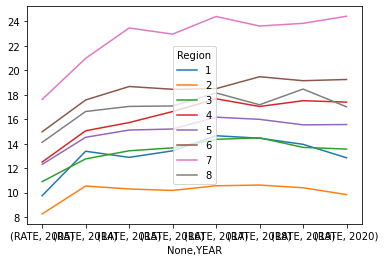

In [11]:
sui_avr.T.plot();

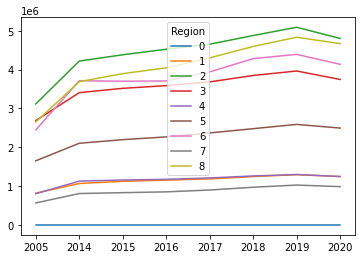

In [12]:
sp_avr.T.plot();